In [1]:
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

In [2]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
#Importing Configs
# Define the path where config.py is located
#Mac
os.chdir('/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling')
#Linux
#os.chdir('/home/kwnabors/Documents/GitHub/Finance-ML-Modeling')
config_file_path = os.getcwd()
print(config_file_path)

# Add this path to the sys.path
sys.path.append(config_file_path)

import config

#Configs
database_file = config.database
database_folder = config.database_folder
bert_models = config.bert_models
bert_models_local = config.bert_models_local
Sentiment_models = config.Sentiment_models
finbert_models = config.finbert_models
database = config.Local_Database

Body = config.Body
Model = config.Model
Model_Subfolder = f'/{Body} Texts/{Model}'
#Model_Folder = config.texts
# Model_Folder = config.Sentiment_models
# Model_Folder = Model_Folder + Model_Subfolder
Model_Folder = config.Sentiment_models

Body_2 = config.Body_2
Model_2 = config.Model_2
Model_Subfolder_2 = f'/{Body_2} Texts/{Model_2}'
Model_Folder_2 = config.texts
Model_Folder_2 = Model_Folder_2 + Model_Subfolder_2


/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling
/Users/kylenabors/Documents
/Users/kylenabors/Documents/GitHub/Finance-ML-Modeling


In [4]:
df1 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short.csv")
df2 = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short_2.csv")

df1 = df1[['date', 'sentiment']]

df1 = df1.groupby(['date']).mean().reset_index()

In [5]:
Fed_list = ["Statements","Minutes"]


df1 = pd.DataFrame()
for i in Fed_list:
    Body = "Fed"
    Model = i
    Model_Subfolder = f'/{Body} Texts/{Model}'
    Model_Folder = config.Sentiment_models
    dft = pd.read_csv(f"{finbert_models}/{Body}/{Model}/{Body}_{Model}_finbert_model_short.csv")
    
    dft = dft[['date', 'sentiment']]
    df1 = pd.concat([df1, dft])
    

df1 = df1.groupby(['date']).mean().reset_index()

In [6]:
ffr = pd.read_csv('/Users/kylenabors/Documents/Database/Other Data/FFRF/FFRF.csv')
#Convert Date to datetime period days 
ffr['Date'] = pd.to_datetime(ffr['Date'])
ffr = ffr[['Date', 'Price', 'Vol.']]
#Rename Pirce to ffr_price and Vol. to ffr_vol
ffr = ffr.rename(columns={'Price': 'ffr_price', 'Vol.': 'ffr_vol'})
#on ffr_vol remove the k at the end of the number and convert to float
ffr['ffr_vol'] = ffr['ffr_vol'].str.replace('K', '')
ffr['ffr_vol'] = ffr['ffr_vol'].astype(float)
ffr['ffr_vol'] = ffr['ffr_vol'] * 1000

print(ffr.head())

tb10y = pd.read_csv('/Users/kylenabors/Documents/Database/Other Data/10Y Treasury/T10YFF.csv')

tb10y['DATE'] = pd.to_datetime(tb10y['DATE'])
tb10y = tb10y.rename(columns={'T10YFF': 'tb10y'})

tb10y = tb10y[tb10y['tb10y'] != '.']
print(tb10y.head())

ir1 = pd.read_csv(f"{database}/Other Data/2YIR.csv")
ir1 = ir1.rename(columns={'DATE': 'date', 'DGS2': 'IR2'})
ir1['date'] = pd.to_datetime(ir1['date'])
ir1 = ir1[ir1['IR2'] != '.']

        Date  ffr_price    ffr_vol
0 2019-11-14    98.4400 18080.0000
1 2019-11-13    98.4400 48770.0000
2 2019-11-12    98.4300 27110.0000
3 2019-11-11    98.4300  2380.0000
4 2019-11-08    98.4300 32870.0000
        DATE tb10y
0 1962-01-02  1.31
1 1962-01-03  1.53
2 1962-01-04  1.24
3 1962-01-05  1.52
4 1962-01-08  2.03


In [7]:
#Convert date to datetime
df1['date'] = pd.to_datetime(df1['date'])
df1 = df1.merge(ffr, how='left', left_on='date', right_on='Date')
df1 = df1.drop(columns=['Date'])

df1 = df1.merge(tb10y, how='left', left_on='date', right_on='DATE')
df1 = df1.drop(columns=['DATE'])

df1 = df1.merge(ir1, how='left', left_on='date', right_on='date')

#Convert tb10y and IR2 to float
df1['tb10y'] = df1['tb10y'].astype(float)
df1['IR2'] = df1['IR2'].astype(float)

print(df1.dtypes)
#df1 = df1.dropna()
print(df1.head(-10))   


date         datetime64[ns]
sentiment           float64
ffr_price           float64
ffr_vol             float64
tb10y               float64
IR2                 float64
dtype: object
          date  sentiment  ffr_price    ffr_vol   tb10y    IR2
0   1998-07-01    -0.0671        NaN        NaN -0.9100 5.4600
1   1998-08-18    -0.0581        NaN        NaN -0.1300 5.3600
2   1998-09-29    -0.1062        NaN        NaN -0.8500 4.4700
3   1998-11-17    -0.1330        NaN        NaN  0.2600 4.5800
4   1998-12-22     0.0139        NaN        NaN  0.0700 4.5900
..         ...        ...        ...        ...     ...    ...
204 2021-07-28     0.0950    99.9000  3140.0000  1.1600 0.2000
205 2021-09-22     0.0915    99.9200   520.0000  1.2400 0.2500
206 2021-11-03     0.1272    99.9200 22880.0000  1.5200 0.4700
207 2021-12-15     0.0712    99.9200 14220.0000  1.3900 0.6900
208 2022-01-26     0.0610    99.9200 13280.0000  1.7700 1.1300

[209 rows x 6 columns]


In [8]:
df_temp = pd.read_csv(f"/Users/kylenabors/Documents/Database/Other Data/SPY/SPYs.csv")

In [9]:
spy = df_temp.copy(deep=True)
spy = spy[['DATE', 'CRSPTM1', 'TIME']]
spy = spy.rename(columns={'DATE': 'date', 'CRSPTM1': 'spy_price', 'TIME': 'time'})
spy['spy_price'] = spy['spy_price']
spy['date2'] = spy['date'].copy(deep=True)
spy["date"] = spy["date"] + " " + spy["time"]
spy["date"] = pd.to_datetime(spy["date"])
spy["date2"] = pd.to_datetime(spy["date2"])
print(spy.head()) 
print(spy.dtypes)

                 date  spy_price     time      date2
0 2011-04-01 09:30:00  1000.0000  9:30:00 2011-04-01
1 2011-04-01 09:30:01  1001.4000  9:30:01 2011-04-01
2 2011-04-01 09:30:02  1001.7200  9:30:02 2011-04-01
3 2011-04-01 09:30:03  1001.9200  9:30:03 2011-04-01
4 2011-04-01 09:30:04  1001.9900  9:30:04 2011-04-01
date         datetime64[ns]
spy_price           float64
time                 object
date2        datetime64[ns]
dtype: object


In [10]:
spy = spy.merge(df1, how='left', left_on='date2', right_on='date')
spy = spy.drop(columns=['date_y'])
spy = spy.rename(columns={'date_x': 'date'})
spy = spy[['date', 'spy_price', 'sentiment', 'time']]
spy = spy.dropna()


spy["positive"] = np.where(spy["sentiment"] > 0.05, 1, 0)
spy["negative"] = np.where(spy["sentiment"] < -0.05, 1, 0)
spy["neutral"] = np.where((spy["sentiment"] <= 0.05) & (spy["sentiment"] >= -0.05), 1, 0)
print(spy.head())

spy_pos = spy[spy['positive'] == 1]
spy_neg = spy[spy['negative'] == 1]
spy_neu = spy[spy['neutral'] == 1]

                      date  spy_price  sentiment     time  positive  negative  \
397817 2011-04-27 09:30:00  1016.5400     0.0028  9:30:00         0         0   
397818 2011-04-27 09:30:01  1017.0400     0.0028  9:30:01         0         0   
397819 2011-04-27 09:30:02  1017.0300     0.0028  9:30:02         0         0   
397820 2011-04-27 09:30:03  1017.0700     0.0028  9:30:03         0         0   
397821 2011-04-27 09:30:04  1017.1400     0.0028  9:30:04         0         0   

        neutral  
397817        1  
397818        1  
397819        1  
397820        1  
397821        1  


In [11]:
#Caculate mean of sentiment overall 
spy_mean = spy['sentiment'].mean()
spy_mean = round(spy_mean, 4)
print(spy_mean)

-0.014


In [12]:
spy = spy[['date', 'spy_price',]]

# Set the 'date_time' column as the index
spy.set_index('date', inplace=True)

# Shift the 'price' column by 5 minutes
spy['price_5_min_ago'] = spy['spy_price'].shift(freq='5T')

# Calculate the difference
#spy['diff'] = spy['spy_price'] - spy['price_5_min_ago']
spy['diff'] = 100 * np.log10(spy['spy_price'] / spy['price_5_min_ago'])

#For diff remove observations that are below the 5th percentile or above the 95th percentile
spy = spy[spy['diff'] >= spy['diff'].quantile(.05)]
spy = spy[spy['diff'] <= spy['diff'].quantile(.95)]

# Reset the index if you want 'date_time' back as a column
spy.reset_index(inplace=True)

spy = spy[['date', 'spy_price', 'diff']]
spy['time'] = spy['date'].dt.time
spy_2 = spy.groupby(['time']).agg(["mean", "var"]).reset_index()
spy_2.columns = ['_'.join(col).strip() for col in spy_2.columns.values]
spy_2['spy_price_sd'] = spy_2['spy_price_var'] ** 0.5
spy_2['diff_sd'] = spy_2['diff_var'] ** 0.5
spy_2 = spy_2[['time_', 'spy_price_mean', 'spy_price_sd', 'diff_mean', 'diff_sd']]
spy_2 = spy_2.rename(columns={'time_': 'time'})
spy_2 = spy_2.dropna()
print(spy_2.head())

spy_2['time'] = pd.to_datetime(spy_2['time'], format='%H:%M:%S')
print(spy_2.dtypes) 
spy_2 = spy_2.sort_values(by=['time'])
spy_2 = spy_2.set_index('time')
spy_2 = spy_2.between_time('12:00:00', '16:00:00')
spy_2 = spy_2.reset_index()
#Remove the date from the time column
spy_2['time'] = spy_2['time'].dt.time
print(spy_2.head())


       time  spy_price_mean  spy_price_sd  diff_mean  diff_sd
0  09:35:00       1951.1038      694.3304     0.0053   0.0387
1  09:35:01       1885.1036      697.6290    -0.0034   0.0380
2  09:35:02       1865.1129      694.5532    -0.0016   0.0358
3  09:35:03       1882.9679      699.9986    -0.0013   0.0350
4  09:35:04       1904.2262      698.1270    -0.0019   0.0358
time              datetime64[ns]
spy_price_mean           float64
spy_price_sd             float64
diff_mean                float64
diff_sd                  float64
dtype: object
       time  spy_price_mean  spy_price_sd  diff_mean  diff_sd
0  12:00:00       1921.5326      704.8149    -0.0009   0.0181
1  12:00:01       1921.5396      704.8211    -0.0008   0.0180
2  12:00:02       1918.1026      701.8738    -0.0000   0.0193
3  12:00:03       1918.0997      701.8711    -0.0002   0.0191
4  12:00:04       1921.5371      704.8213    -0.0010   0.0177


In [13]:

spy_pos = spy_pos[['date', 'spy_price',]]

# Set the 'date_time' column as the index
spy_pos.set_index('date', inplace=True)

# Shift the 'price' column by 5 minutes
spy_pos['price_5_min_ago'] = spy_pos['spy_price'].shift(freq='5T')

# Calculate the difference
spy_pos['diff'] = 100 * np.log10(spy_pos['spy_price'] / spy_pos['price_5_min_ago'])

#For diff remove observations that are below the 5th percentile or above the 95th percentile
spy_pos = spy_pos[spy_pos['diff'] >= spy_pos['diff'].quantile(.05)]
spy_pos = spy_pos[spy_pos['diff'] <= spy_pos['diff'].quantile(.95)]

# Reset the index if you want 'date_time' back as a column
spy_pos.reset_index(inplace=True)

spy_pos = spy_pos[['date', 'spy_price', 'diff']]
spy_pos['time'] = spy_pos['date'].dt.time
spy_pos_2 = spy_pos.groupby(['time']).agg(["mean", "var"]).reset_index()
spy_pos_2.columns = ['_'.join(col).strip() for col in spy_pos_2.columns.values]
spy_pos_2['spy_price_sd'] = spy_pos_2['spy_price_var'] ** 0.5
spy_pos_2['diff_sd'] = spy_pos_2['diff_var'] ** 0.5
spy_pos_2 = spy_pos_2[['time_', 'spy_price_mean', 'spy_price_sd', 'diff_mean', 'diff_sd']]
spy_pos_2 = spy_pos_2.rename(columns={'time_': 'time'})
spy_pos_2 = spy_pos_2.dropna()
print(spy_pos_2.head())

spy_pos_2['time'] = pd.to_datetime(spy_pos_2['time'], format='%H:%M:%S')
print(spy_pos_2.dtypes) 
spy_pos_2 = spy_pos_2.sort_values(by=['time'])
spy_pos_2 = spy_pos_2.set_index('time')
spy_pos_2 = spy_pos_2.between_time('12:00:00', '16:00:00')
spy_pos_2 = spy_pos_2.reset_index()
spy_pos_2['time'] = spy_pos_2['time'].dt.time
print(spy_pos_2.head())

       time  spy_price_mean  spy_price_sd  diff_mean  diff_sd
0  09:35:00       2384.0991      844.9811    -0.0105   0.0326
1  09:35:01       2310.4987      819.0458    -0.0041   0.0368
2  09:35:02       2310.4993      819.0432    -0.0025   0.0325
3  09:35:03       2310.4853      819.0075    -0.0054   0.0280
4  09:35:04       2272.7937      805.4278    -0.0023   0.0308
time              datetime64[ns]
spy_price_mean           float64
spy_price_sd             float64
diff_mean                float64
diff_sd                  float64
dtype: object
       time  spy_price_mean  spy_price_sd  diff_mean  diff_sd
0  12:00:00       2196.3522      801.4971    -0.0000   0.0140
1  12:00:01       2196.3574      801.4943     0.0003   0.0142
2  12:00:02       2196.3678      801.5181     0.0004   0.0145
3  12:00:03       2196.3570      801.5073     0.0002   0.0146
4  12:00:04       2196.3519      801.4953     0.0001   0.0141


In [14]:

spy_neg = spy_neg[['date', 'spy_price',]]

# Set the 'date_time' column as the index
spy_neg.set_index('date', inplace=True)

# Shift the 'price' column by 5 minutes
spy_neg['price_5_min_ago'] = spy_neg['spy_price'].shift(freq='5T')

# Calculate the difference
spy_neg['diff'] = 100 * np.log10(spy_neg['spy_price'] / spy_neg['price_5_min_ago'])

#For diff remove observations that are below the 5th percentile or above the 95th percentile
spy_neg = spy_neg[spy_neg['diff'] >= spy_neg['diff'].quantile(.05)]
spy_neg = spy_neg[spy_neg['diff'] <= spy_neg['diff'].quantile(.95)]

# Reset the index if you want 'date_time' back as a column
spy_neg.reset_index(inplace=True)

spy_neg = spy_neg[['date', 'spy_price', 'diff']]
spy_neg['time'] = spy_neg['date'].dt.time
spy_neg_2 = spy_neg.groupby(['time']).agg(["mean", "var"]).reset_index()
spy_neg_2.columns = ['_'.join(col).strip() for col in spy_neg_2.columns.values]
spy_neg_2['spy_price_sd'] = spy_neg_2['spy_price_var'] ** 0.5
spy_neg_2['diff_sd'] = spy_neg_2['diff_var'] ** 0.5
spy_neg_2 = spy_neg_2[['time_', 'spy_price_mean', 'spy_price_sd', 'diff_mean', 'diff_sd']]
spy_neg_2 = spy_neg_2.rename(columns={'time_': 'time'})
spy_neg_2 = spy_neg_2.dropna()
print(spy_neg_2.head())

spy_neg_2['time'] = pd.to_datetime(spy_neg_2['time'], format='%H:%M:%S')
print(spy_neg_2.dtypes) 
spy_neg_2 = spy_neg_2.sort_values(by=['time'])
spy_neg_2 = spy_neg_2.set_index('time')
spy_neg_2 = spy_neg_2.between_time('12:00:00', '16:00:00')
spy_neg_2 = spy_neg_2.reset_index()
spy_neg_2['time'] = spy_neg_2['time'].dt.time
print(spy_neg_2.head())

       time  spy_price_mean  spy_price_sd  diff_mean  diff_sd
0  09:35:00       1651.1123      509.1394     0.0148   0.0477
1  09:35:01       1616.6359      612.7340     0.0010   0.0443
2  09:35:02       1613.1467      594.6354    -0.0071   0.0414
3  09:35:03       1699.7305      634.7421    -0.0068   0.0454
4  09:35:04       1699.7400      634.7772    -0.0077   0.0429
time              datetime64[ns]
spy_price_mean           float64
spy_price_sd             float64
diff_mean                float64
diff_sd                  float64
dtype: object
       time  spy_price_mean  spy_price_sd  diff_mean  diff_sd
0  12:00:00       1744.2685      690.8062     0.0033   0.0262
1  12:00:01       1758.8557      686.0233     0.0054   0.0287
2  12:00:02       1758.8517      686.0120     0.0055   0.0287
3  12:00:03       1744.2747      690.8022     0.0031   0.0258
4  12:00:04       1758.8294      685.9833     0.0052   0.0286


In [15]:

spy_neu = spy_neu[['date', 'spy_price',]]

# Set the 'date_time' column as the index
spy_neu.set_index('date', inplace=True)

# Shift the 'price' column by 5 minutes
spy_neu['price_5_min_ago'] = spy_neu['spy_price'].shift(freq='5T')

# Calculate the difference
spy_neu['diff'] = 100 * np.log10(spy_neu['spy_price'] / spy_neu['price_5_min_ago'])

#For diff remove observations that are below the 5th percentile or above the 95th percentile
spy_neu = spy_neu[spy_neu['diff'] > spy_neu['diff'].quantile(.05)]
spy_neu = spy_neu[spy_neu['diff'] < spy_neu['diff'].quantile(.95)]

# Reset the index if you want 'date_time' back as a column
spy_neu.reset_index(inplace=True)

spy_neu = spy_neu[['date', 'spy_price', 'diff']]
spy_neu['time'] = spy_neu['date'].dt.time
spy_neu_2 = spy_neu.groupby(['time']).agg(["mean", "var"]).reset_index()
spy_neu_2.columns = ['_'.join(col).strip() for col in spy_neu_2.columns.values]
spy_neu_2['spy_price_sd'] = spy_neu_2['spy_price_var'] ** 0.5
spy_neu_2['diff_sd'] = spy_neu_2['diff_var'] ** 0.5
spy_neu_2 = spy_neu_2[['time_', 'spy_price_mean', 'spy_price_sd', 'diff_mean', 'diff_sd']]
spy_neu_2 = spy_neu_2.rename(columns={'time_': 'time'})
spy_neu_2 = spy_neu_2.dropna()
print(spy_neu_2.head())

spy_neu_2['time'] = pd.to_datetime(spy_neu_2['time'], format='%H:%M:%S')
print(spy_neu_2.dtypes) 
spy_neu_2 = spy_neu_2.sort_values(by=['time'])
spy_neu_2 = spy_neu_2.set_index('time')
spy_neu_2 = spy_neu_2.between_time('12:00:00', '16:00:00')
spy_neu_2 = spy_neu_2.reset_index()
spy_neu_2['time'] = spy_neu_2['time'].dt.time
print(spy_neu_2.head())

       time  spy_price_mean  spy_price_sd  diff_mean  diff_sd
0  09:35:00       1708.4914      523.7691     0.0145   0.0376
1  09:35:01       1753.1539      533.9562     0.0012   0.0371
2  09:35:02       1744.1037      520.4430    -0.0030   0.0342
3  09:35:03       1744.1216      520.4638    -0.0029   0.0351
4  09:35:04       1797.4715      559.9597    -0.0034   0.0343
time              datetime64[ns]
spy_price_mean           float64
spy_price_sd             float64
diff_mean                float64
diff_sd                  float64
dtype: object
       time  spy_price_mean  spy_price_sd  diff_mean  diff_sd
0  12:00:00       1849.2400      592.8158    -0.0035   0.0149
1  12:00:01       1849.2479      592.8276    -0.0035   0.0152
2  12:00:02       1849.2550      592.8428    -0.0034   0.0153
3  12:00:03       1849.2547      592.8511    -0.0035   0.0153
4  12:00:04       1849.2544      592.8538    -0.0035   0.0154


In [16]:
import datetime

# Convert datetime.time to datetime.datetime
def time_to_datetime(time_obj):
    return datetime.datetime.combine(datetime.date.today(), time_obj)

spy_2['time'] = spy_2['time'].apply(time_to_datetime)
spy_pos_2['time'] = spy_pos_2['time'].apply(time_to_datetime)
spy_neg_2['time'] = spy_neg_2['time'].apply(time_to_datetime)
spy_neu_2['time'] = spy_neu_2['time'].apply(time_to_datetime)

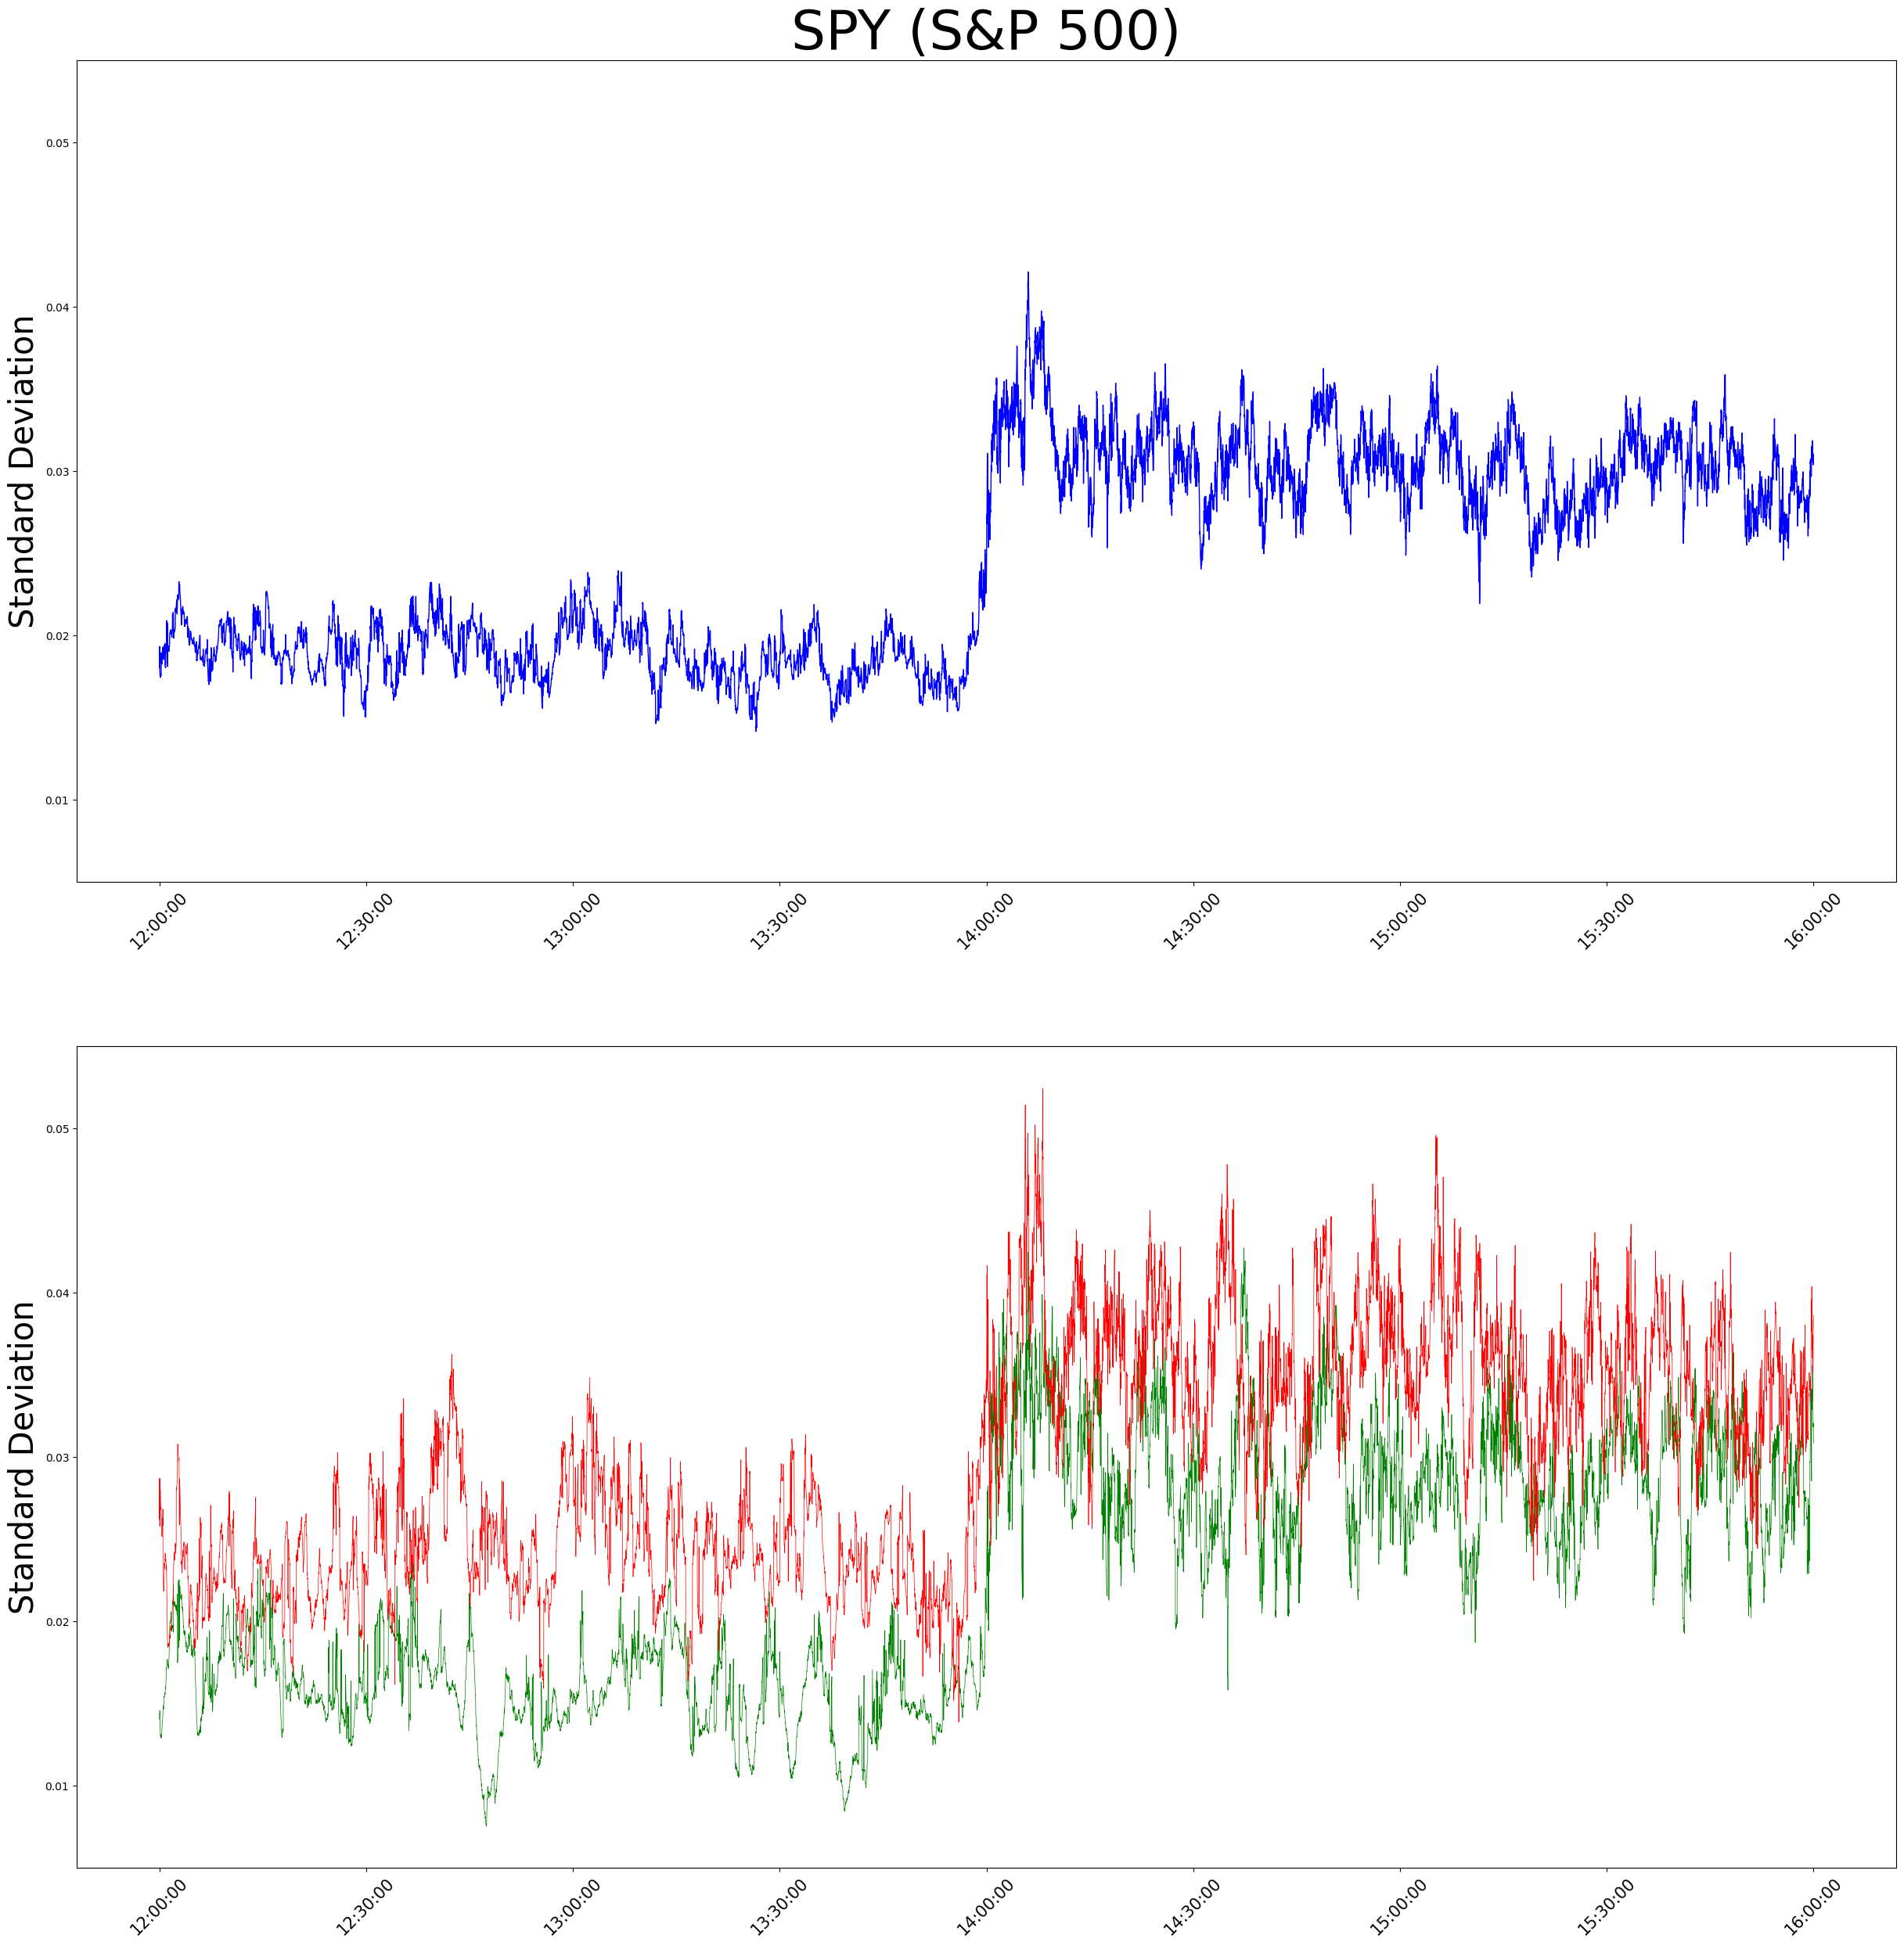

In [17]:
# Create a list of x-axis tick positions
num_ticks = 30  # Adjust this number as needed
x_tick_positions_0 = spy_2['time'].iloc[::len(spy_2) // num_ticks].tolist()

fig, axs = plt.subplots(2, 1, figsize=(30, 30))
#axs = [axs, axs.twiny()]

import matplotlib.dates as mdates

# Now you can plot
axs[0].plot(spy_2['time'], spy_2['diff_sd'], color='blue', linewidth=1)
axs[1].plot(spy_pos_2['time'], spy_pos_2['diff_sd'], color='green', linewidth=0.5)
axs[1].plot(spy_neg_2['time'], spy_neg_2['diff_sd'], color='red', linewidth=0.5)
#axs[1].plot(spy_neu_2['time'], spy_neu_2['diff_sd'], color='orange', linewidth=0.5)

# Format the x-axis to display only the time
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Set Y axis scales so that they both fit evenly on the chart
axs[0].set_ylim(0.005, 0.055)
axs[1].set_ylim(0.005, 0.055)

axs[0].tick_params(axis='x', rotation=45, labelsize=15)
axs[1].tick_params(axis='x', rotation=45, labelsize=15)
#Set y label
axs[0].set_ylabel('Standard Deviation', fontsize=30)
axs[1].set_ylabel('Standard Deviation', fontsize=30)

axs[0].set_title(f'SPY (S&P 500)', fontsize=50)

plt.show()